<a href="https://colab.research.google.com/github/MariaMoreira04/ia_colabGoogleMaria/blob/main/PracticaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
url='https://raw.githubusercontent.com/Sinchiguano/ai_googleColab/main/smallDataset/movies.csv'

movies=pd.read_csv(url)
movies.head(3)
print(type(movies.shape))
print(movies.shape)
print(movies.index)
print(movies.columns)
movies[7000:7010]

<class 'tuple'>
(9742, 3)
RangeIndex(start=0, stop=9742, step=1)
Index(['movieId', 'title', 'genres'], dtype='object')


,movieId,title,genres
7000,67665,Anvil! The Story of Anvil (2008),Documentary|Musical
7001,67695,Observe and Report (2009),Action|Comedy
7002,67734,Adventureland (2009),Comedy|Drama
7003,67788,Confessions of a Shopaholic (2009),Comedy|Romance
7004,67799,The Butterfly Effect 3: Revelations (2009),Drama|Fantasy|Sci-Fi|Thriller
7005,67888,Man on the Flying Trapeze (1935),Comedy
7006,67923,"Fast & Furious (Fast and the Furious 4, The) (...",Action|Crime|Drama|Thriller
7007,67997,In the Loop (2009),Comedy
7008,68073,Pirate Radio (2009),Comedy|Drama
7009,68135,17 Again (2009),Comedy|Drama


In [36]:
import pandas as pd
url='https://raw.githubusercontent.com/Sinchiguano/ai_googleColab/main/smallDataset/ratings.csv'

ratings=pd.read_csv(url)
ratings.head(3)
print(ratings.shape)
print(ratings.index)
print(ratings.columns)
ratings[7000:7010]

del ratings['timestamp']
ratings[7000:7010]

(100836, 4)
RangeIndex(start=0, stop=100836, step=1)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating
7000,47,49530,3.0
7001,47,49824,2.5
7002,47,51931,5.0
7003,47,53894,3.5
7004,47,55247,4.0
7005,47,56587,4.0
7006,47,59725,3.5
7007,47,63082,4.0
7008,47,63876,3.0
7009,47,68932,3.5


In [38]:
import pandas as pd
url='https://raw.githubusercontent.com/Sinchiguano/ai_googleColab/main/smallDataset/tags.csv'

tags=pd.read_csv(url)
tags.head(3)
print(tags.shape)
print(tags.index)
print(tags.columns)


del tags['timestamp']
tags[360:3610]

(3683, 4)
RangeIndex(start=0, stop=3683, step=1)
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


,userId,movieId,tag
360,62,136864,dark
361,62,136864,dc comics
362,62,136864,Gal Gadot
363,62,136864,superhero
364,62,136864,superman
...,...,...,...
3605,599,1732,great dialogue
3606,599,1732,great soundtrack
3607,599,1732,Highly quotable
3608,599,1732,imdb top 250


In [39]:
print(tags.iloc[[340,2,333]])
print('\n')
print(tags.tail(3))
print('\n')
print(tags.head(3))

     userId  movieId           tag
340      62   135536        Batman
2         2    60756  will ferrell
333      62   135133    revolution


      userId  movieId               tag
3680     610     3265            gun fu
3681     610     3265  heroic bloodshed
3682     610   168248  Heroic Bloodshed


   userId  movieId              tag
0       2    60756            funny
1       2    60756  Highly quotable
2       2    60756     will ferrell


In [40]:
print(ratings.head(3))
print('\n')
ratings['rating'].describe()

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0




count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [41]:
ratings['rating'].mean()

3.501556983616962

In [42]:
ratings['rating'].min()

0.5

In [43]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [44]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [45]:
#FILTERS DATAS
filter=ratings['rating']>5
print(filter.any())
#print(ratings[filter])
print(filter.shape)

False
(100836,)


In [46]:
#FILTERS DATAS
filter=ratings['rating']>4
print(filter.any())
print(ratings.shape)
#print(ratings[filter])
#print(filter.shape)
dfNew=ratings[filter]
print(dfNew.shape)

True
(100836, 3)
(21762, 3)


In [48]:
movies.head(3)
print(movies.isnull().any())

movieId    False
title      False
genres     False
dtype: bool


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

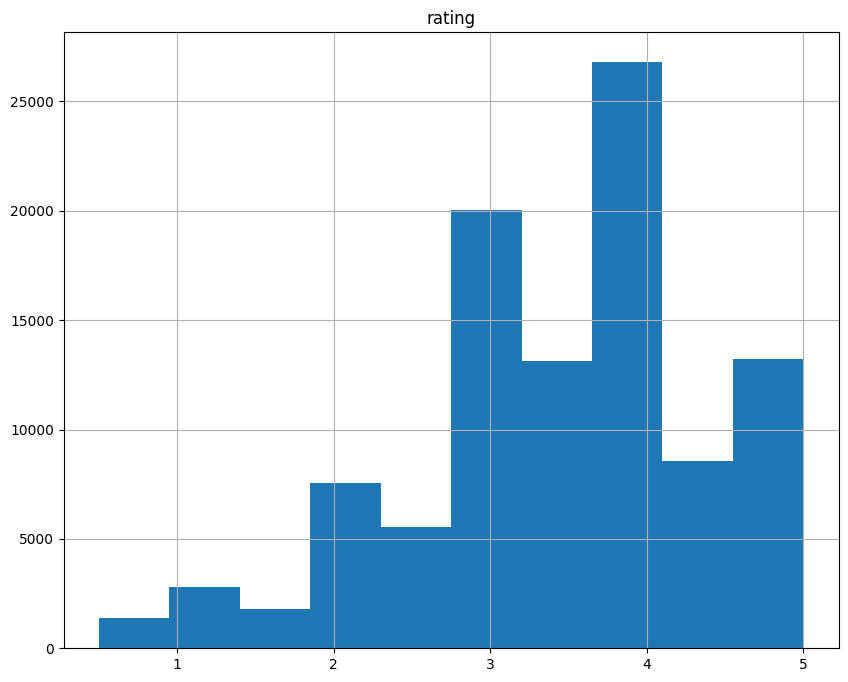

In [50]:
ratings.hist(column='rating', figsize=(10, 8))

<Axes: >

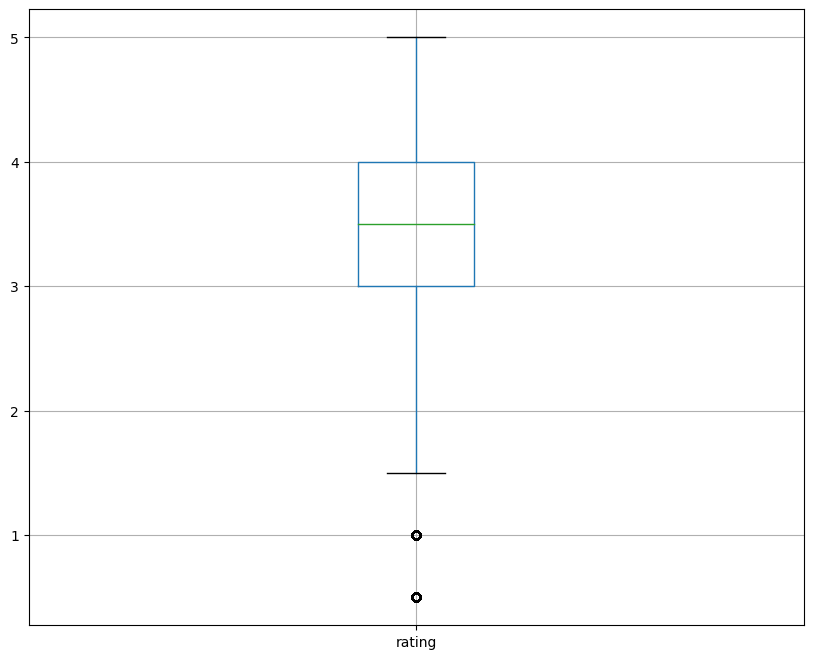

In [52]:
from pandas.plotting import boxplot
ratings.boxplot(column='rating', figsize=(10, 8))

In [58]:
tags.head(5)
print(tags.columns)
print(tags.shape)
counter_=tags['tag'].value_counts()
counter_.head(10)

Index(['userId', 'movieId', 'tag'], dtype='object')
(3683, 3)


In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64

<Axes: >

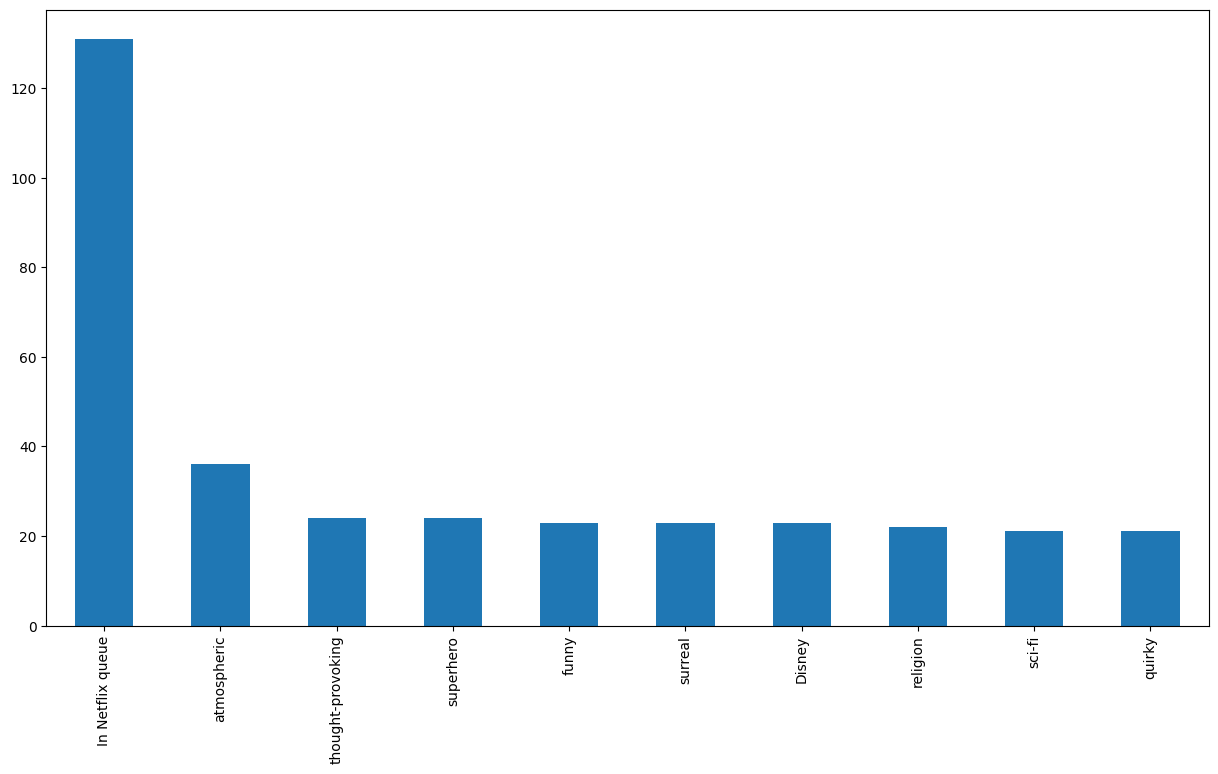

In [60]:
counter_[:10].plot(kind='bar', figsize=(15, 8))

In [64]:
#GROUPBY
print(ratings.head(5))
tmpRating=ratings[['movieId','rating']].groupby('movieId').mean()
tmpRating.head(10)

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000
9,3.125000
